In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

register_matplotlib_converters()

In [3]:
train_df = pd.read_csv("../data/train.csv")
train_df["date"] = pd.to_datetime(train_df["date"])
train_df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [5]:
df1 = train_df[(train_df["store"] == 1) & (train_df["item"] == 1)][["date", "sales"]]
df1

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
1821,2017-12-27,14
1822,2017-12-28,19
1823,2017-12-29,15
1824,2017-12-30,27


In [6]:
series1 = pd.Series(df1["sales"].values, df1["date"])
series1

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Length: 1826, dtype: int64

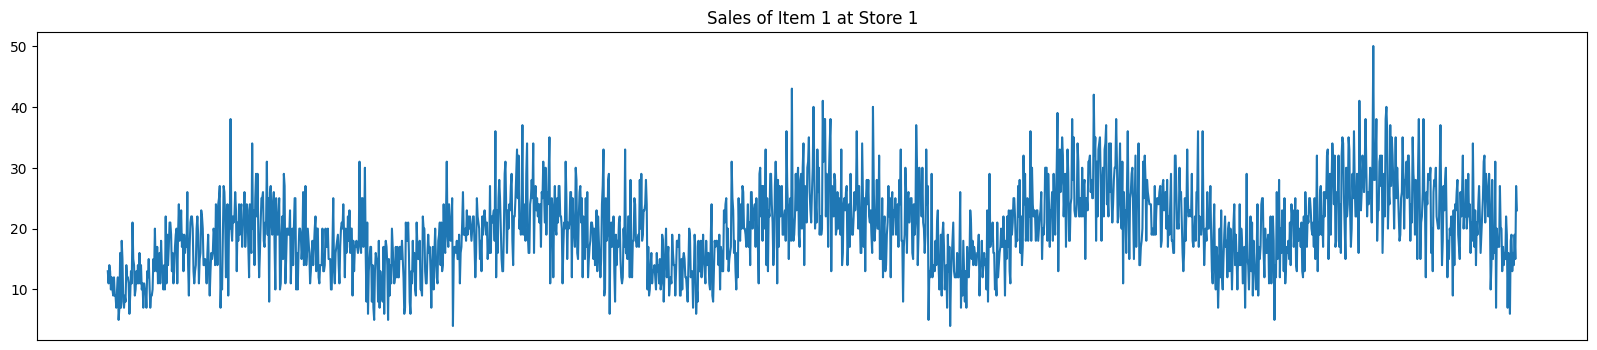

In [7]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
x = np.arange(0, len(series1.index), 120)
plt.xticks(x, series1.index[x], rotation=45)
plt.title("Sales of Item 1 at Store 1")

plt.plot(series1)
plt.show()

In [8]:
result1 = adfuller(series1)
result1[1]

0.022569380626570427

### The unit root test shows that the series is stationary at the 5% significance level but from some EDA notebooks (which I have deleted) the total is steadily increasing. So I will assume (just in case) that the series is not stationary. From what I saw in Kaggle, there is no seasonal effect - thefore, the series is difference-stationary and applying a difference will most likely be enough to get a new series which is stationary.

### Note that stationary series make ACF and PACF analysis easier.

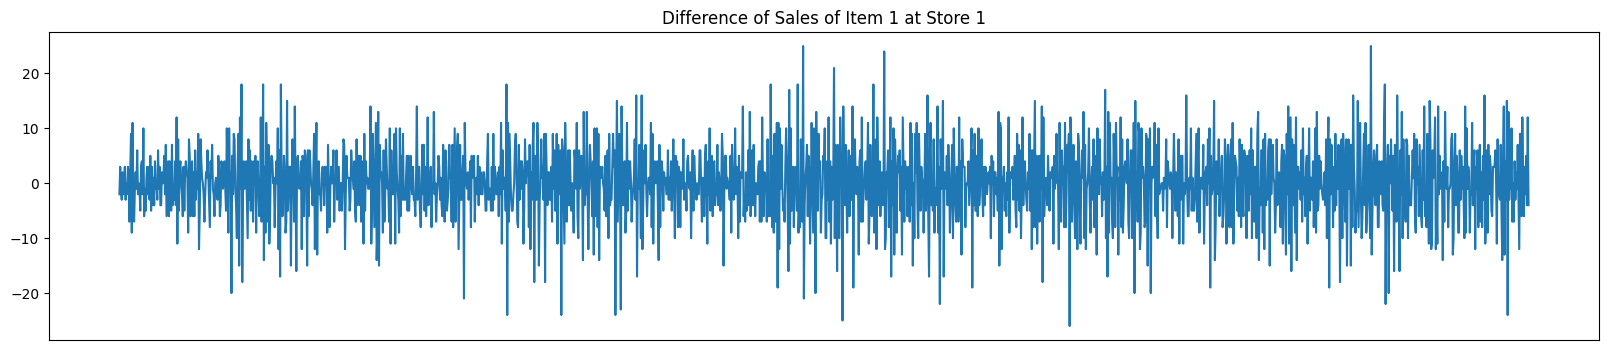

In [9]:
series2 = series1.diff().dropna()
series2

plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
x = np.arange(0, len(series2.index), 120)
plt.xticks(x, series2.index[x], rotation=45)
plt.title("Difference of Sales of Item 1 at Store 1")

plt.plot(series2)
plt.show()
# series2 = series1.asfreq(pd.infer_freq(series1.index))

In [10]:
result2 = adfuller(series2)
result2[1]

1.210927632043708e-23

### The difference series is stationary and the unit test shows that it is (5% significance). Difference d = 1 is enough.

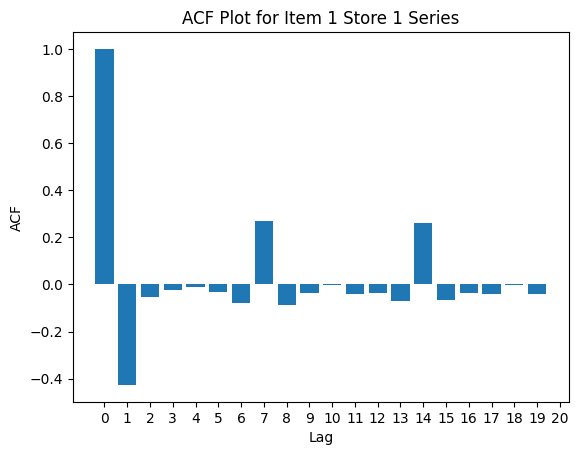

In [11]:
acf_vals = acf(series2)
num_lags = 20

plt.title("ACF Plot for Item 1 Store 1 Series")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.xticks(range(num_lags+1))
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.show()

### Try MA term <= 1

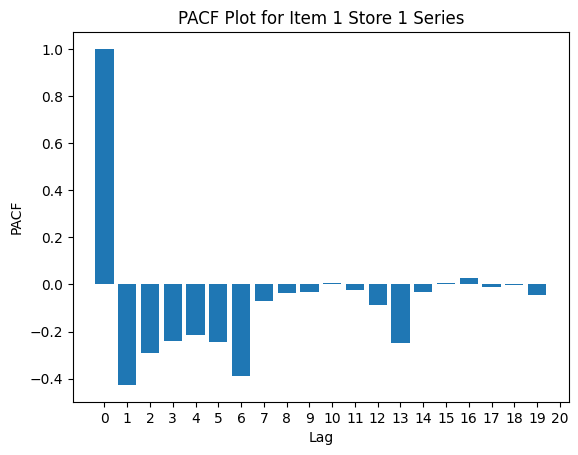

In [12]:
pacf_vals = pacf(series2)
num_lags = 20

plt.title("PACF Plot for Item 1 Store 1 Series")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.xticks(range(num_lags+1))
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.show()

# Try AR term <= 6

In [13]:
model = ARIMA(series1, order=(6,1,2))
model_fit = model.fit()
model_fit.summary()

/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(6, 1, 2)   Log Likelihood               -5590.925
Date:                Sat, 21 Oct 2023   AIC                          11199.851
Time:                        22:20:26   BIC                          11249.435
Sample:                    01-01-2013   HQIC                         11218.141
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7087      0.074     -9.606      0.000      -0.853      -0.564
ar.L2         -0.5814      0.043    -13.667      0.000      -0.665      -0.498
ar.L3         -0.5641      0.037    -15.239      0.000      -0.637      -0.492
ar.L4         -0.5132      0.035    -14.795      0.000      -0.581      -0.445
ar.L5         -0.4489      0.031    -14.369      0.000      -0.510      -0.388
ar.L6         -0.3420      0.025    -13.610      0.000      -0.391      -0.293
ma.L1         -0.1430      0.077     -1.848      0.065      -0.295       0.009
ma.L2         -0.1130      0.068     -1.664      0.096      -0.246       0.020
sigma2        26.7891      0.821     32.635      0.000      25.180      28.398
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.57
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Terms are not significant at 5% level probably because AR Terms contribute too much to the response variable.

In [14]:
model2 = ARIMA(series1, order=(3,1,2))
model_fit2 = model2.fit()
model_fit2.summary()

/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5641.723
Date:                Sat, 21 Oct 2023   AIC                          11295.446
Time:                        22:20:31   BIC                          11328.502
Sample:                    01-01-2013   HQIC                         11307.640
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5408      0.119      4.533      0.000       0.307       0.775
ar.L2         -0.1254      0.028     -4.507      0.000      -0.180      -0.071
ar.L3         -0.1048      0.031     -3.390      0.001      -0.165      -0.044
ma.L1         -1.4039      0.121    -11.639      0.000      -1.640      -1.167
ma.L2          0.4762      0.110      4.341      0.000       0.261       0.691
sigma2        28.3260      0.866     32.711      0.000      26.629      30.023
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                13.76
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

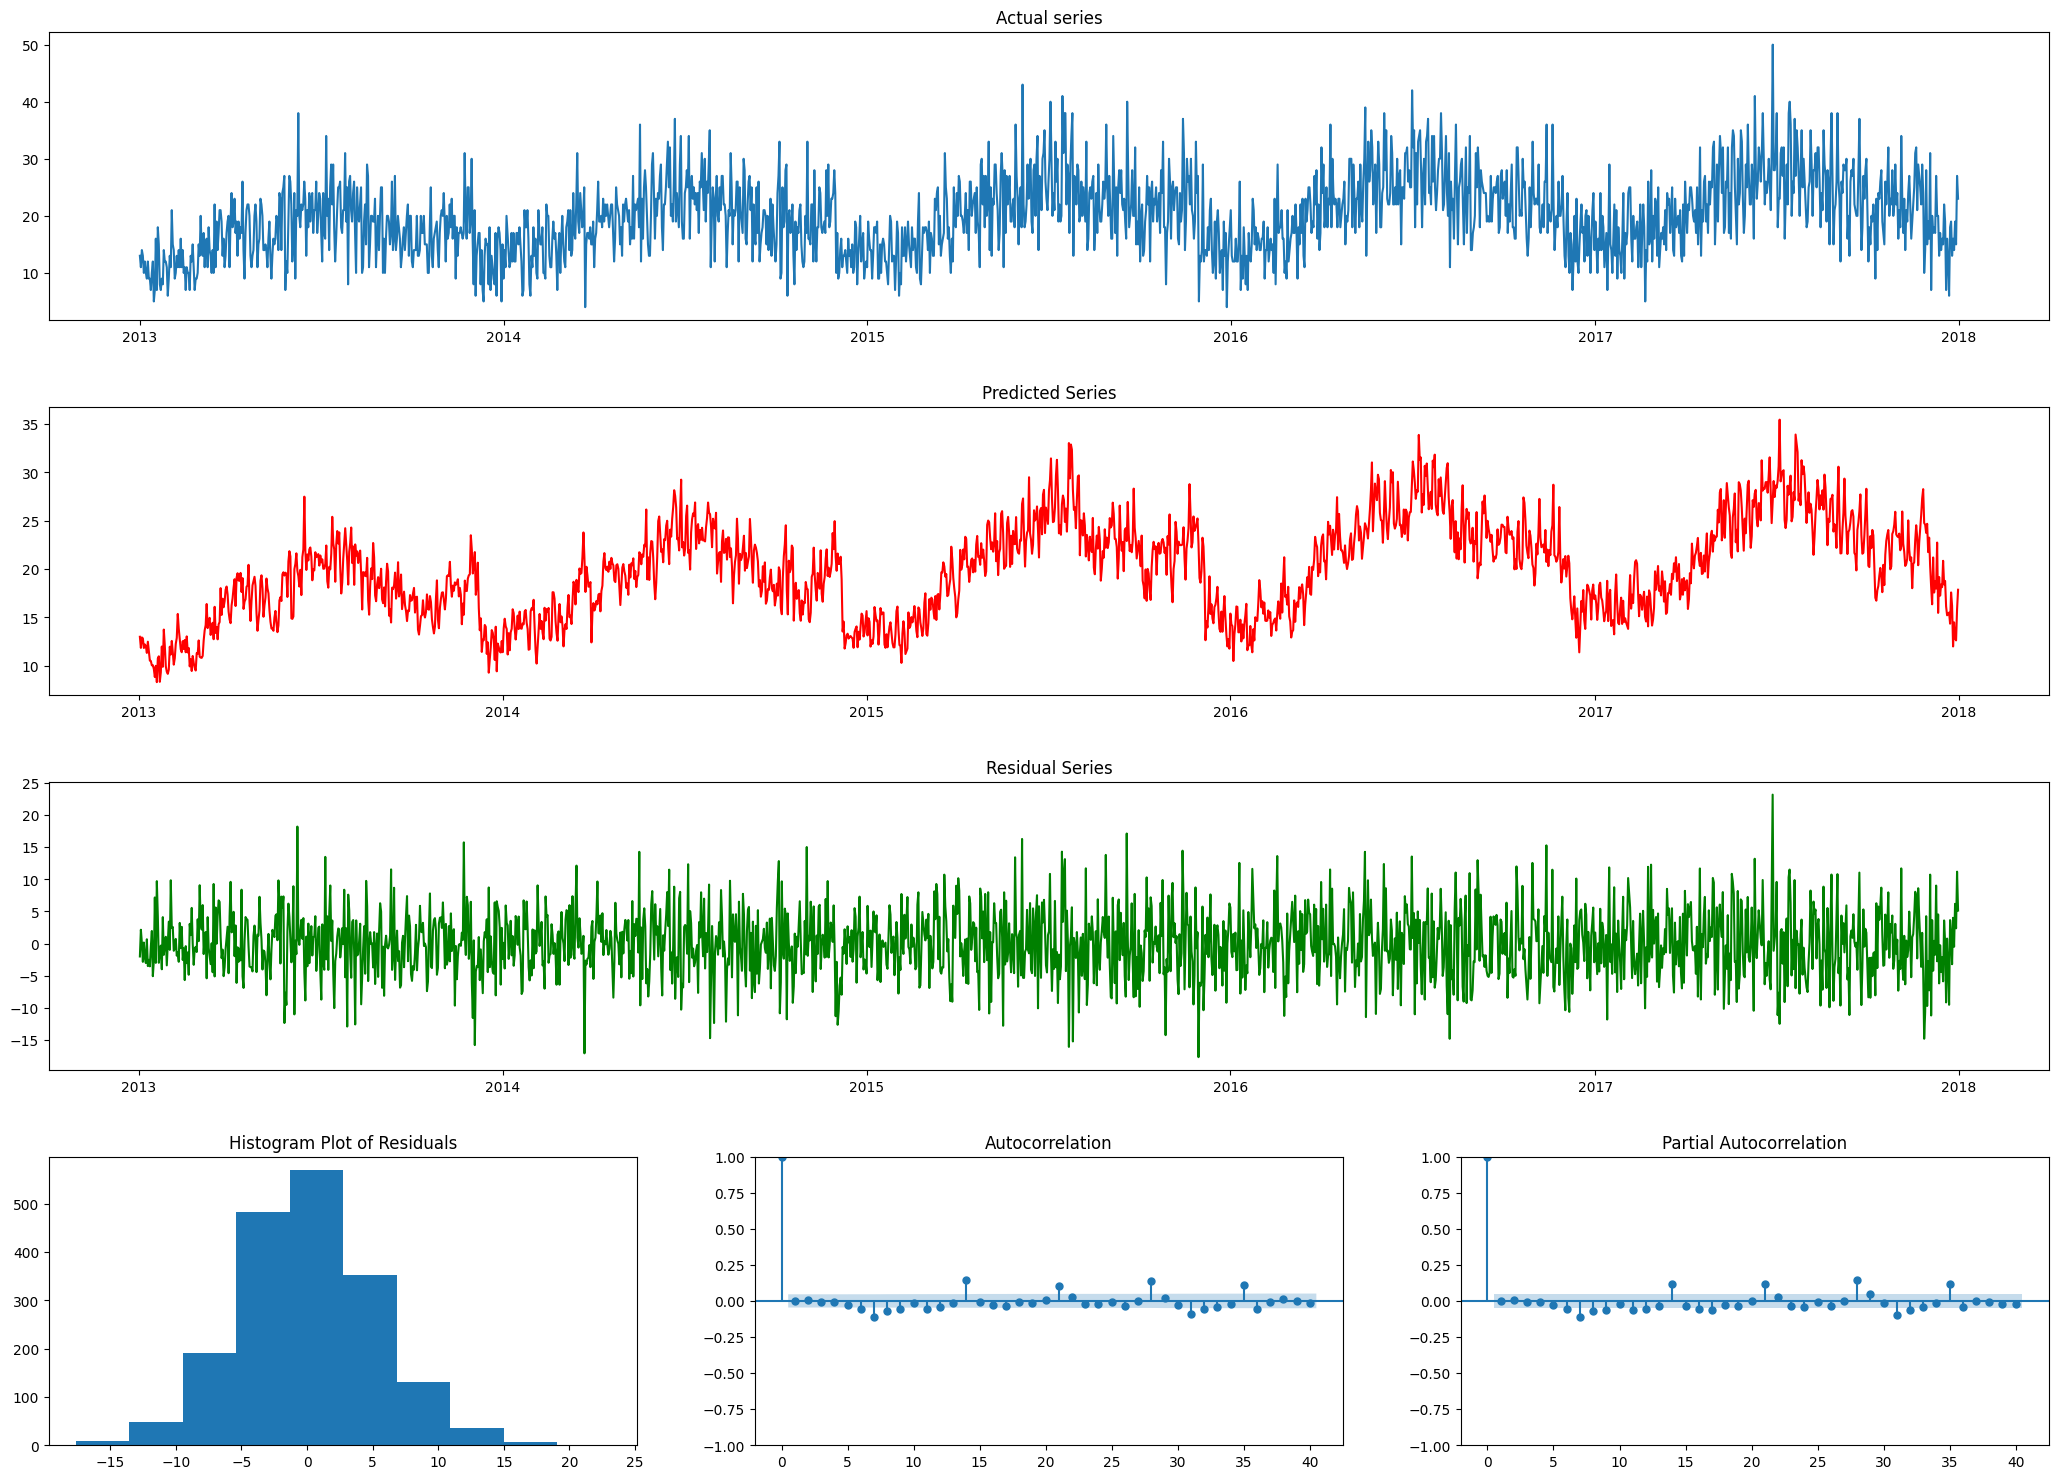

In [111]:
# Plot the predictions of the fitted model vs the actual model
def predict_and_plot(fitted_model, model_name, data):
    pred = fitted_model.predict(start=data.index[0], end=data.index[-1])

    # First prediction is zero
    pred = pred[1:]
    res = (data - pred).dropna()

    fig = plt.figure(figsize=(20, 15))
    fig.subplots_adjust(left=0, right=1)
    
    subfigs = fig.subfigures(4,1)

    p1 = subfigs[0].subplots()
    p1.plot(data)
    p1.set_title("Actual series")

    p2 = subfigs[1].subplots()
    p2.plot(pred, color="red")
    p2.set_title("Predicted Series")

    p3 = subfigs[2].subplots()
    p3.plot(data - pred, color = "green")
    p3.set_title("Residual Series")

    axs = subfigs[3].subplots(1, 3)
    axs[0].hist(res)
    axs[0].set_title("Histogram Plot of Residuals")

    plot_acf(res, lags=40, ax=axs[1]) 

    plot_pacf(res, lags=40, ax=axs[2]) 
    
    # fig, axs = plt.subplots(4, 1, figsize=(20,10))

    # axs[0].plot(data)
    # axs[0].set_title("Actual series")
    
    # axs[1].plot(pred, color="red")
    # axs[1].set_title(f"Predicted series {model_name}")

    # axs[2].plot(data - pred, color="red")
    # axs[2].set_title("Residual series")

    # axs[3].hist(data-pred)

    #plt.tight_layout()
    plt.show()

predict_and_plot(model_fit, "ARIMA(6, 1, 2)", series1)

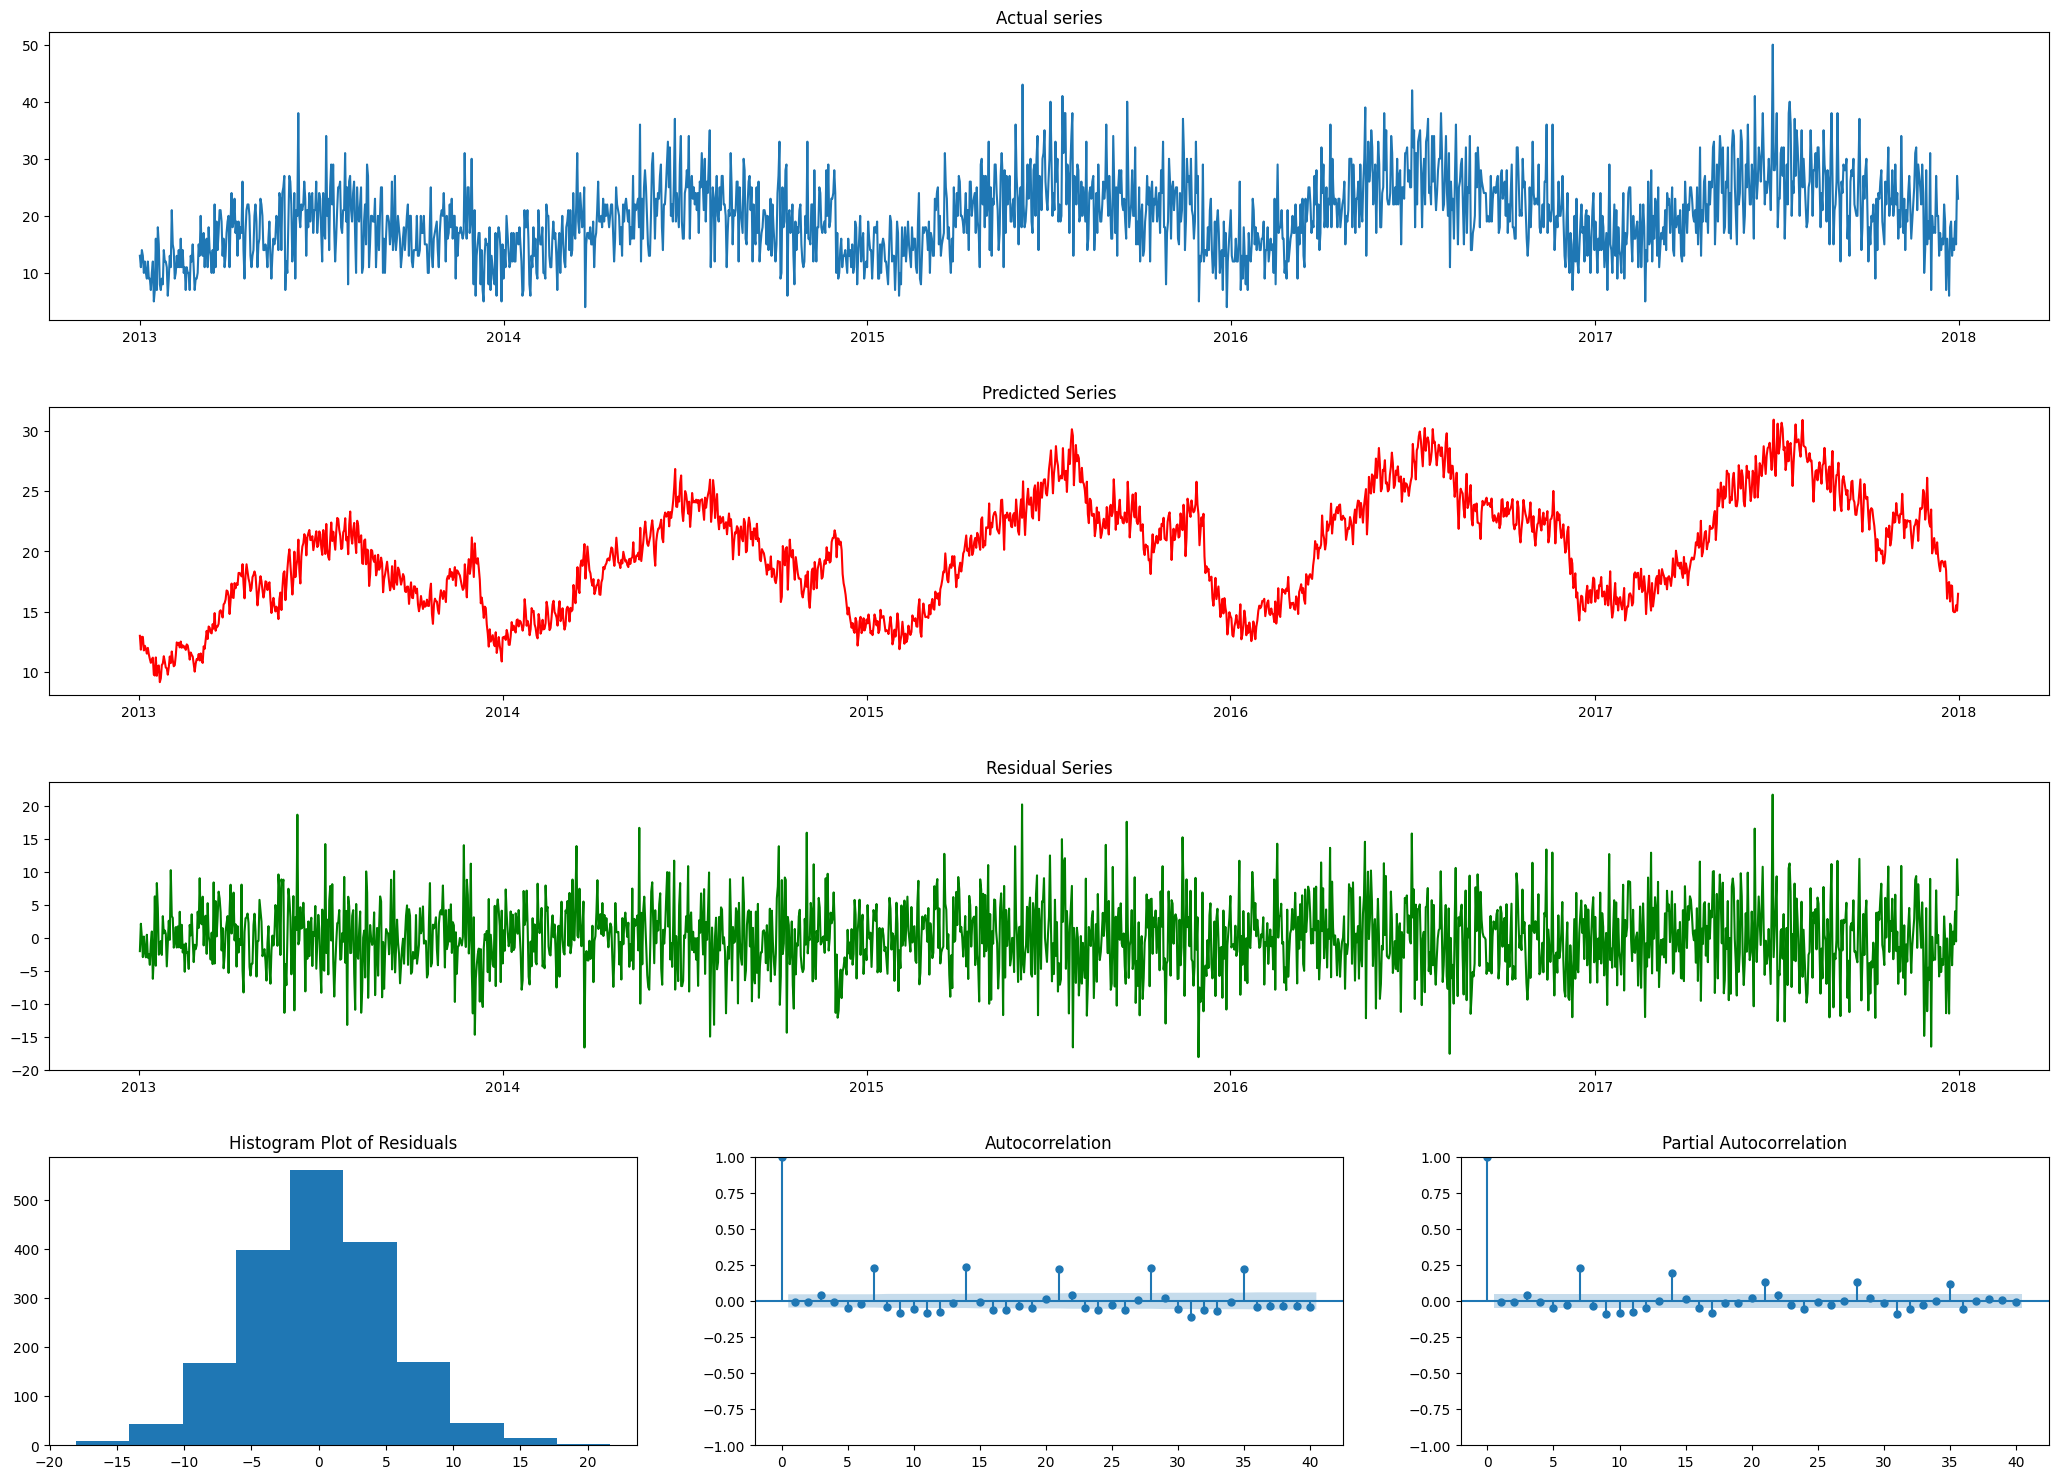

In [112]:
predict_and_plot(model_fit2, "ARIMA(3, 1, 2)", series1)

/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/

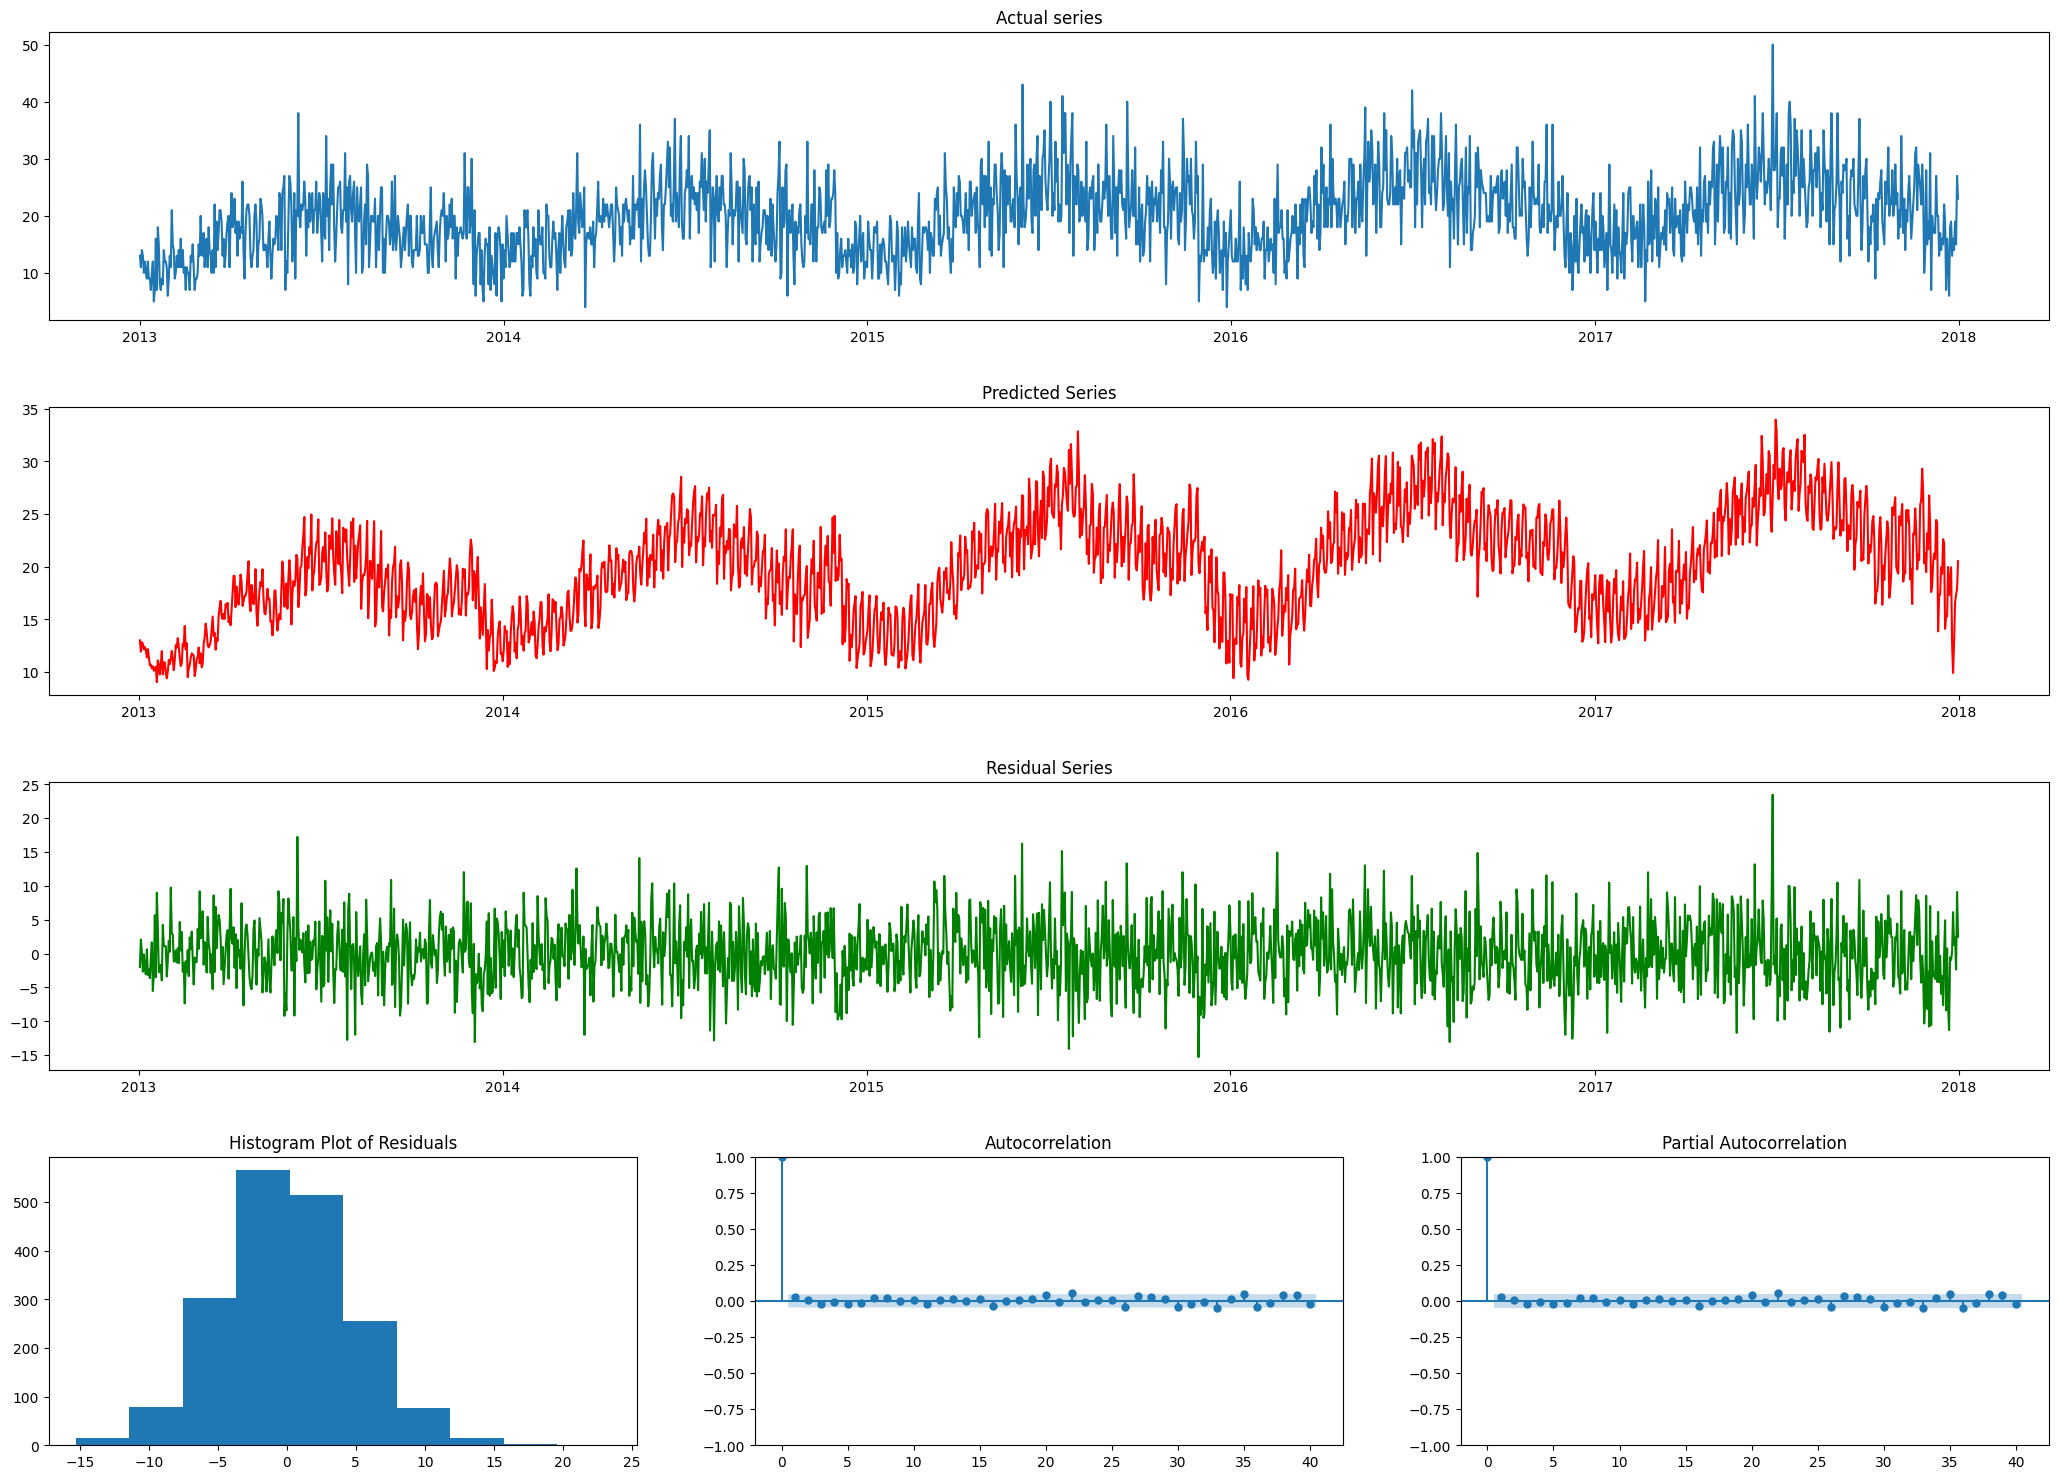

In [114]:
predict_and_plot(ARIMA(series1, order=(20,1,20)).fit(), "ARIMA(20, 1, 20)", series1)

## Higher ACF and PACF doesn't always mean better predictions. It takes longer to train and overfitting becomes an issue. In some cases it may be worse because ARIMA fails early. An optimal model would have the following things
 1) No apparent pattern in autocorrelation and partial autocorrelation plots
 2) The values in ACF and PACF plots are less than the significance value (normally 0.5) except for the first one (called lag 0)
 3) A normally distributed residual
 4) "Normal walk pattern" for residual series

### d = 1 is enough for this time series. We may want to explore different models 0 <= p <= 2 and 0 <= q <= 7 (the bare minimum, from the analysis of store 1 item 1 series). Moreover, ARIMA is univariate model, meaning we have to train for every possible combination (item x store = 500) and even so it doesn't account for the correlation between items. 

### Prophet is a better alternative in this sense since its multivariate. However, I'm also thinking of incorporating ARIMA with deep learning -- use the predicted values of ARIMA as a feature? Maybe (y - y_pred_from_ARIMA) is a feature independent of time, and this could make the NN more efficient?